In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

In [20]:
assert hasattr(tf, "function")#tensorflow version 2.0

In [29]:
pip install scikit-learn # pour pouvoir avoir acces a StandardScalar (Normalisation)

In [21]:
from sklearn.preprocessing import StandardScaler #normalisation  

In [22]:
#module sklearn pour la partie train/validation/test
from sklearn.model_selection import train_test_split

#Data load
fashion_mnist= tf.keras.datasets.fashion_mnist
(images, targets), (_,_)= fashion_mnist.load_data()

images = images[:10000] #Choix de 10000 images et targets
targets = targets[:10000]

print(images.mean()) # la moy est de 73 avant la normalisation
print(images.std()) #l'eccart type est énorme = 90 avant la normalisation


# Normalisation 
images=images.reshape(-1, 784) #Flatten images dANS LE SENS DE LA NORMALISATION)
images= images.astype(float)

scaler= StandardScaler() # Use StandardScaler pour la normalisation des données d'entrée
images= scaler.fit_transform(images) #Transformer l'image 

print(images.mean()) # la moyenne est proche de 0 apres la normalisation
print(images.std()) # l'ecart type est de 1 apres la normalisation 

#split data 
images_train, images_test, targets_train, targets_test=train_test_split(images, targets, test_size=0.2, random_state=1)

print(images_train.shape, targets_train.shape)
print(images_test.shape,targets_test.shape)
#print(images.shape)
#print(targets.shape)
#print(images[0]) # nos valeurs apres normalisation toute proche de 0 = cela va rendre le processus rapide pour converger vers de bonnes solutions
#print(images[0])
#print(targets[0]) 

73.00877385204082
90.2745808471392
-1.0476880134421886e-18
1.0000000000000007
(8000, 784) (8000,)
(2000, 784) (2000,)


In [23]:
targets_names= ["Top", "Trouser", "Pull", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]


#plt.imshow(images[15], cmap="binary")
#plt.title(targets_names[targets[15]])
#plt.show()

In [31]:
#cretate a model --> Layer of 256 Neuron + another layer of 128 neuron and finally an output of 10 neurons because we have 10 possible outputs
#Flatten the image (Créer model)
#First thing we create a sequential model to be able to add stuff on it, then we add our image (Flatten) in shape 28,28

 
#Flatten
model= tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) #transformer l'image en image plate (Pas besoin quand on fait la normalisation)

#Add layers 
model.add(tf.keras.layers.Dense(256, activation = "relu")) #Dense = un calk 256 fois lde l'image applatie precedente
model.add(tf.keras.layers.Dense(128, activation = "relu")) #Seconde hidden layer of 128 neuron (#Connecté à la couche d'avant grace a SEQUENTIAL)
model.add(tf.keras.layers.Dense(10, activation="softmax")) #Neurones de sortie

model_outout = model.predict(images[0:1])
print(model_outout, targets[0:1])

1/1 [==============================] - 0s 130ms/step
[[0.06605202 0.04312359 0.00968581 0.14316463 0.10187652 0.04952341
  0.37996706 0.01720961 0.01620292 0.17319438]] [9]


In [25]:
#model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Compile the error
model.compile(
            loss="sparse_categorical_crossentropy", #fonction d'erreur
            optimizer="sgd", #optimizer utilisant descent gradient
            metrics=["accuracy"] #a quel point il a fait la prediction/ par ex s'ila fait 60 bonne images sur 100--> l'accuracy =60%
)

In [33]:
#Train the model (Faire un fit=lancer l'apprentissage= on va donner au model nos images avec les targets et les erreurs)
history= model.fit(images_train, targets_train, epochs=10, validation_split=0.2) #on veut le faire 10 fois le training

Epoch 1/10
200/200 [==============================] - 2s 6ms/step - loss: 0.8990 - accuracy: 0.7044 - val_loss: 0.6407 - val_accuracy: 0.7713
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 0.5454 - accuracy: 0.8128 - val_loss: 0.5616 - val_accuracy: 0.7919
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4632 - accuracy: 0.8411 - val_loss: 0.5136 - val_accuracy: 0.8169
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4144 - accuracy: 0.8561 - val_loss: 0.4964 - val_accuracy: 0.8213
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3782 - accuracy: 0.8711 - val_loss: 0.4823 - val_accuracy: 0.8338
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3503 - accuracy: 0.8809 - val_loss: 0.4654 - val_accuracy: 0.8344
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3270 - accuracy: 0.8880 - val_loss: 0.4654 - val_accuracy: 0.8356
Epoch 

In [34]:
print(history.history)

{'loss': [0.8989699482917786, 0.5454461574554443, 0.4631953835487366, 0.4144149124622345, 0.37816759943962097, 0.35033661127090454, 0.32702362537384033, 0.30511370301246643, 0.28774887323379517, 0.2711850106716156], 'accuracy': [0.7043750286102295, 0.8128125071525574, 0.8410937786102295, 0.8560937643051147, 0.87109375, 0.8809375166893005, 0.8879687786102295, 0.8942187428474426, 0.9009374976158142, 0.9129687547683716], 'val_loss': [0.640704333782196, 0.5616298913955688, 0.5136411786079407, 0.4963534474372864, 0.48225048184394836, 0.4653688371181488, 0.46536388993263245, 0.46072426438331604, 0.44794923067092896, 0.44444480538368225], 'val_accuracy': [0.7712500095367432, 0.7918750047683716, 0.8168749809265137, 0.8212500214576721, 0.8337500095367432, 0.8343750238418579, 0.8356249928474426, 0.8356249928474426, 0.8387500047683716, 0.8412500023841858]}


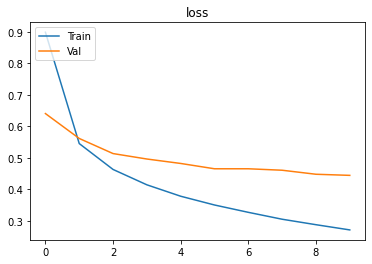

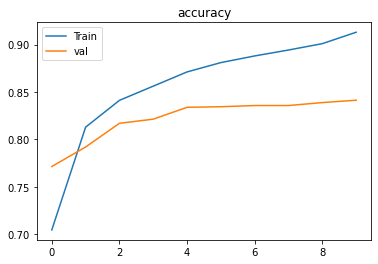

In [36]:
loss_curve = history.history["loss"]
accuracy_curve = history.history["accuracy"]

loss_val_curve=history.history["val_loss"]
acc_val_curve=history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc="upper left")
plt.title("loss")
plt.show()

plt.plot(accuracy_curve, label="Train")
plt.plot(acc_val_curve, label="val")
plt.legend(loc="upper left")
plt.title("accuracy")
plt.show()

In [41]:
#sauvegarde 
model.save('DL_Tensorflow.h5')
#install h5py in anaconda prompt 
load

SyntaxError: invalid syntax (Temp/ipykernel_7948/1218567846.py, line 1)